In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 401
t = np.linspace(-2 , 2 , N)
w = np.linspace(-np.pi , np.pi , N)


def g(t):
    return np.cos(2*np.pi*t) + 0.5*np.sin(4*np.pi*t)





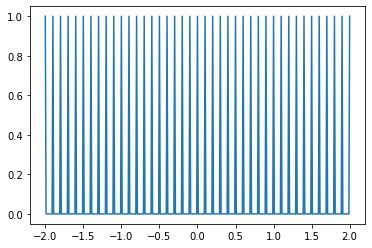

Impulse Train P(t) for sampling


In [3]:
Rtime = 0.1
def p(t , Rtime):
    L=[]
    for i in t:
       
        if abs(i/Rtime - round(i/Rtime)) < 0.01:
            L.append(1)
        else:
            L.append(0)
    return np.array(L)
    

plt.plot(t,p(t , Rtime))
plt.show()
print("Impulse Train P(t) for sampling")
            

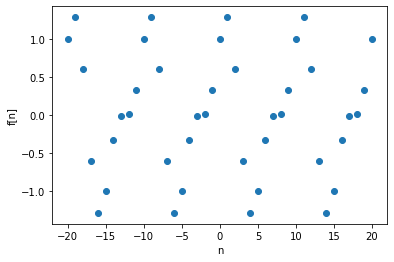

Sampled Signal


In [4]:
x = g(t)*p(t,Rtime)
q = int(2/Rtime)
x1 = []
N = np.linspace(-q,q , (2*q)+1)
for i in x:
    
    if i!=0:
        x1.append(i)
x = np.array(x1)

plt.scatter(N , x)
plt.xlabel('n')
plt.ylabel('f[n]')
plt.show()
print("Sampled Signal")

<function p at 0x7f013942c1e0>
[ 1.          1.28454525  0.60290962 -0.60290962 -1.28454525 -1.
 -0.33348874 -0.01512437  0.01512437  0.33348874  1.          1.28454525
  0.60290962 -0.60290962 -1.28454525 -1.         -0.33348874 -0.01512437
  0.01512437  0.33348874  1.          1.28454525  0.60290962 -0.60290962
 -1.28454525 -1.         -0.33348874 -0.01512437  0.01512437  0.33348874
  1.          1.28454525  0.60290962 -0.60290962 -1.28454525 -1.
 -0.33348874 -0.01512437  0.01512437  0.33348874  1.        ]


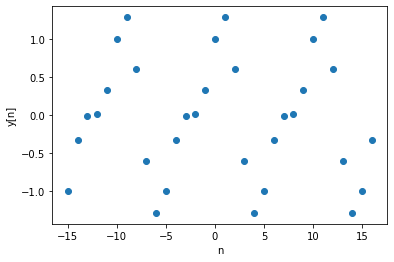

Signal after applying the window function


In [5]:
L = 3.2
n = L/(2*Rtime)

print(p)
n = int(n)
print(x)
x1 = x[q+1-n:q+1+n] 
N1 = N[q+1-n:q+1+n] 
plt.scatter(N1,x1)
plt.xlabel('n')
plt.ylabel('y[n]')
plt.show()
print("Signal after applying the window function")

[ 1.28454525+0.j          2.15248866-2.00029707j -3.79367631+6.06817917j
  1.57509565+0.65067984j -3.17583756+1.58433306j -1.79779258+0.82401209j
 -1.47125817+0.49862848j -1.34094866+0.27439001j -1.29034366+0.08801189j
 -1.29034366-0.08801189j -1.34094866-0.27439001j -1.47125817-0.49862848j
 -1.79779258-0.82401209j -3.17583756-1.58433306j  1.57509565-0.65067984j
 -3.79367631-6.06817917j  2.15248866+2.00029707j]


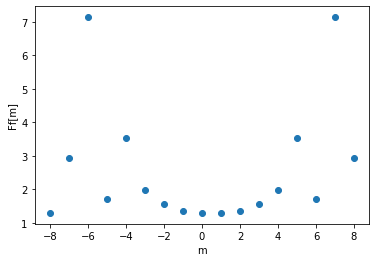

FT of sampled signal further sampled in frequency domain


In [6]:
Rfreq = 0.2
m = L/Rfreq + 1
fx = np.fft.fftn(x1,int(m))
print(fx)
m = int(m)
plt.scatter(np.linspace(-int(m//2) , int(m//2) , int(m)) , np.abs(fx))
plt.xlabel('m')
plt.ylabel('Ff[m]')
plt.show()
print("FT of sampled signal further sampled in frequency domain")

In [8]:

def w2(t):
    k = []
    for i in t:
        
    
        
        if abs(i)<= L/2:
            
            k.append(1- (2*abs(i)/L))
        else:
            k.append(0)
            
    return np.array(k)

def w3(t):
    k = []
    for i in np.sin(2*np.pi*t/L)**2:
        
    
        
        if abs(i)<= L/2:
            
            k.append(i)
        else:
            k.append(0)
            
    return np.array(k)

f2 = g(t)*w2(t)
f3 = g(t)*w3(t)
  
  
    


In [9]:
y2 = f2*p(t,Rtime)
y3 = f3*p(t,Rtime)
x1 = []
N = np.linspace(-10,10 , 21)
for i in y2:
    
    if i!=0:
        x1.append(i)
y2 = np.array(x1)
x1 = []
N = np.linspace(-10,10 , 21)
for i in y3:
    
    if i!=0:
        x1.append(i)
y3 = np.array(x1)

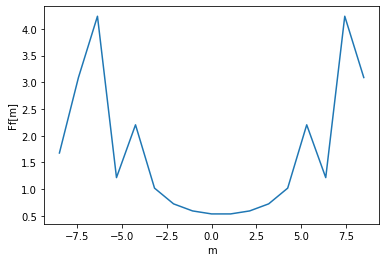

DFT with window function w2


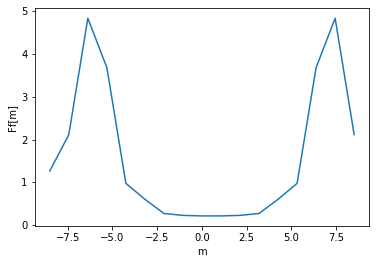

DFT with window function w3


In [11]:
plt.plot(np.linspace(-m/2 , m/2 , m) , np.abs(np.fft.fftn(y2,int(m))))
plt.xlabel('m')
plt.ylabel('Ff[m]')

plt.show()
print("DFT with window function w2")
plt.plot(np.linspace(-m/2 , m/2 , m) , np.abs(np.fft.fftn(y3,int(m))))
plt.xlabel('m')
plt.ylabel('Ff[m]')

plt.show()
print("DFT with window function w3")